# Project 2: Ames Housing Predicition
--------------------------------------------------------------------------------------------------------------------------

## EDA and Data Cleaning 

### Contents:
**01_EDA_and_Cleaning.ipynb** (Current Notebook)<br>
|   |__ a__ [Introduction](#Introduction)<br>
|   |__ b__ [Problem Statement](#Problem-Statement)<br>
|   |__ c__ [Executive Summary](#Executive-Summary)<br>
|   |__ d__ [Libraries](#Libraries)<br>
|   |__ e__ [Source](#Source)<br>
|   |__ f__ [Understanding the Dataset](#Understanding-the-dataset)<br>
|   |__ g__ [EDA](#Exploratory-Data-Analysis-(EDA))<br>
|   |__ h__ [Visualising Features](#Visualizing-Features)<br>
|   |__ i__ [Observations](#Observation)<br>
02_Preprocessing.ipynb<br>
03_Feature_Engineering_and_Model_Benchmarks.ipynb<br>


## Introduction
___________________________________________________________________________________________________________________________

The Ames Housing Data Set from the Ames Assessor’s Office used in computing the value of individual residential properties sold in Ames, Iowa from 2006 to 2010. Predict the price of homes at sale for the Aimes Iowa Housing dataset

The data set contains information for more than 2900 properties. The data dictionary outlines more than 75 descriptive variables. Some are nominal (categorical), meaning they are non-numerical and lack clear-cut order (Examples: Neighborhood, Type of roofing). Some are ordinal, meaning they are categorical but have a clear order (Example: Heating Quality (Excellent, Good, Average, Poor)). Some are discrete, meaning they are numerical but at set intervals (Year Built, Number of Fireplaces). The rest are continuous, meaning they are numerical and can theoretically take any value in a range (1st Floor Square Feet).

## Problem Statement
___________________________________________________________________________________________________________________________

The aim is to **predict** the **sales price** for each house by creating a **regression model** based on the Ames Housing Dataset (2006 - 2010).

## Executive Summary
___________________________________________________________________________________________________________________________




There are three Jupyter notebooks in this research: (1)Data cleaning and EDA, (2)Preprocessing and Feature Engineering, and (3)Model Tuning and Conclusion. 

In the EDA and data cleaning notebook:
1. There are columns with null values in total in both Categorical and Numerical Data <br>
2. There are a few with typo error with the data set <br>
3. These features contains common rating <br>
4. Features who has the incorrect data type<br>
9. Some data points can be combined to give a better correlation to sale price

In the Preprocessing and Feature Engineering:
1. Cleaning of Data
2. Get dummies for data
3. Correlation of cleaned dataset

In Model Tuning and Conclusion:
1. Preparation of data for evaluation
2. Predict pricing of housing


**Conclusion and Recommendation** <br><br>
Between the three regression model, Lasso performs in terms of predicting the Ames housing price. Of note, Elastic Net Regression Model have yet to be tested but it should perform better than Lasso.

Among all the features within the dataset, features with condition, area or age gives a better predictor as compared to other features. With the predictor, the relationship between additional amenities (e.g. basement/garage) and the price becomes very prominent. The age of the building on the other hand shows that as the building ages, the price gradually decreases.

For existing homeowners looking to increase the value of their house, they can consider (1) Improving the quality of condition of basic amenities(e.g. house condition, kitchen) or (2) adding additional amenities within the house (e.g. garage, fireplace, pool).

However, people using the model to purchase the house should note that the model is based on dataset from 2006 - 2010 and the model may not hold as there may be changes in the past ten year (current year 2020). There may be other factors like government and external influence (e.g. pandemic or disasters) were not taken into consideration. Apart from that, this dataset is only done based on Ames, USA. Hence, it may not be applicable overseas let alone other states of US. Other factors like FOMO (Fear of Mission Out) will also cost a shift in saleprice and it is hard to predict at times.

In order to overcome the limitation, more data is required considering longer timeframe or other states or countries. More specialised consideration can be included like government's or external influence which may explain potential outliers within the data set.

### Source
- Data Cleaning Guide: https://realpython.com/python-data-cleaning-numpy-pandas/ <br>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

#editting of setting to view all columns and rows within the dataset
pd.options.display.max_columns = None 
#There are 80+ columns withing the dataframe, this setting is required if you want to view the entire columns in the dataframe.
pd.options.display.max_rows = None

## EDA and Cleaning

### Understanding the dataset

1. Reading the data

In [2]:
#importing the csv for training for the prediction model.
train = pd.read_csv("../datasets/train.csv")

2. Displaying the data

In [58]:
# Displaying the first few rows of the train dataset
# features are capitalised with spacing (will be changed to ease coding later)
# features are classified into three types; (1) Numerical, (2) Categorical (ordinal), and (3) Categorical
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#there are 2051 data points and 81 features
train.shape

(2051, 81)

In [5]:
#converting all columns to remove spacing and lowercasing to faciliate future exploitation 
train.columns = train.columns.str.lower().str.replace(" ", "")

### Preliminary Findings

According to the table, all numerical columns within the data set where present in the table.<br>
Some should be ignored, example ID and PID which are an invalid representation.<br>
Featuers like sf or saleprice can potentially show outliers within the dataset example houses with extreme prices<br>
From 1st glance, "garageyrblt" has an outlier where it indicates 2027 and most likely is an typo(to change to 2007)<br>
Certain features also indicates that it is either a left/right skewed distribution which will be more visible when plotted.

In [59]:
#Indentifying all the columns containing numerical inputs within the train data set and trying to indentify outliers
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
mssubclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lotfrontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lotarea,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overallqual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overallcond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
yearbuilt,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
yearremod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
masvnrarea,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


For mssubclass, mosold was considered as numerical despite being a catergorical data (to convert to correct dtype)
For yrsold, yearbuilt, yearremod/add, garageyrblt are all years and numerical but it would be accurate to calculate the age
Among the dataset, there are a number of features with more than 90% null values. This will be reflected clearer with subsequent coding. The large number of null values will make prediction inaccurate and should be replace with either a numerical number of string.

In [7]:
#Indentifying all the data of every columns in train and trying to indentify for null values within the individual columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2051 non-null   int64  
 1   pid            2051 non-null   int64  
 2   mssubclass     2051 non-null   int64  
 3   mszoning       2051 non-null   object 
 4   lotfrontage    1721 non-null   float64
 5   lotarea        2051 non-null   int64  
 6   street         2051 non-null   object 
 7   alley          140 non-null    object 
 8   lotshape       2051 non-null   object 
 9   landcontour    2051 non-null   object 
 10  utilities      2051 non-null   object 
 11  lotconfig      2051 non-null   object 
 12  landslope      2051 non-null   object 
 13  neighborhood   2051 non-null   object 
 14  condition1     2051 non-null   object 
 15  condition2     2051 non-null   object 
 16  bldgtype       2051 non-null   object 
 17  housestyle     2051 non-null   object 
 18  overallq

## Exploratory Data Analysis (EDA)
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

Observation from Null values: the Alley, Fence, Pool QC Misc Feature are among the highest in terms of null values. <br>
Consideration: as these features are more than 50% of the dataset, we can consider dropping these features. <br>

In [8]:
#Indentifying all the null values in every columns in train
train.isnull().sum()

id                  0
pid                 0
mssubclass          0
mszoning            0
lotfrontage       330
lotarea             0
street              0
alley            1911
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremod/add       0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype         22
masvnrarea         22
exterqual           0
extercond           0
foundation          0
bsmtqual           55
bsmtcond           55
bsmtexposure       58
bsmtfintype1       55
bsmtfinsf1          1
bsmtfintype2       56
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          0
1stflrsf            0
2ndflrsf  

For poolqc, miscfeature, alley contains more than 90% of missing data which will not aid in prediction. <br>
Hence, it will most likely be dropped

In [9]:
null = pd.Series(train.isnull().mean().sort_values(ascending=False))
null[null > 0]

poolqc          0.995612
miscfeature     0.968308
alley           0.931741
fence           0.804973
fireplacequ     0.487567
lotfrontage     0.160897
garagefinish    0.055583
garagecond      0.055583
garagequal      0.055583
garageyrblt     0.055583
garagetype      0.055095
bsmtexposure    0.028279
bsmtfintype2    0.027304
bsmtfintype1    0.026816
bsmtcond        0.026816
bsmtqual        0.026816
masvnrtype      0.010726
masvnrarea      0.010726
bsmthalfbath    0.000975
bsmtfullbath    0.000975
garagecars      0.000488
garagearea      0.000488
bsmtunfsf       0.000488
bsmtfinsf2      0.000488
totalbsmtsf     0.000488
bsmtfinsf1      0.000488
dtype: float64

In [10]:
#identifying features with null values
train.isnull().sum()[train.isnull().sum() > 0].index

Index(['lotfrontage', 'alley', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'bsmtfullbath', 'bsmthalfbath', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'poolqc', 'fence', 'miscfeature'],
      dtype='object')

In [11]:
#The presence of nan indicates that there are some null values within the dataset
#Other than 140 inputs between Gravel and Paved alley, the rest were null values.
#Furthermore, there is no other features that are descriptive to alley so it should be a single feature.
train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [12]:
# Among the data set, only 9 houses has presence of pool which results in only 9 entries for pool qc while the rest are reflected as null
train[["poolarea", "poolqc"]].loc[train["poolarea"] != 0]

,poolarea,poolqc
52,519,Fa
657,576,Gd
761,800,Gd
952,228,Ex
960,480,Gd
1130,648,Fa
1249,738,Gd
1635,368,TA
1875,561,TA


In [13]:
# The only prominent input for miscfeature is the presence of shed for 56 houses out of the 2000+ houses
train["miscfeature"].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: miscfeature, dtype: int64

In [14]:
#Checking logic for Yr Sold >= Garage Yr Blt/Year Built for train_df
#For index 1699, the garage was built way to ahead in the future, likely a type (to correct to 2007 instead)
#For index 1885, it was sold before the housing is even built so it will be dropped. 
train[['yrsold', 'yearbuilt', 'garageyrblt']].loc[(train['yrsold'] < train['garageyrblt']) | (train['yrsold'] < train['yearbuilt'])]

,yrsold,yearbuilt,garageyrblt
1699,2007,2006,2207.0
1885,2007,2008,2008.0


In [15]:
#Checking logic for Year Remod/Add >= Year Built for train_df
#For index 1003, the remodelling was done before it was built which is not logical so it will be dropped.
train[['yearremod/add', 'yearbuilt']].loc[(train['yearremod/add'] < train['yearbuilt'])]

,yearremod/add,yearbuilt
1003,2001,2002


In [31]:
#As the data indicates no presence of basement, the bsmtfinsf1 and bsmtfinsf2 should be filled with 0 rather than null. 
train[train['bsmtfinsf1'].isnull()==True]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [32]:
#Presence of garagetype but the garagearea is not avaliable
#The data will either be dropped or be filled by the mean of the garagearea in the whole dataset
train[train['garagearea'].isnull()==True]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [49]:
#As both features are measuring the same thing, garage cars will be dropped
train[["garagecars", 'garagearea']].head()

,garagecars,garagearea
0,2.0,475.0
1,2.0,559.0
2,1.0,246.0
3,2.0,400.0
4,2.0,484.0


In [50]:
#As the data indicates no presence of basement, the totalbsmtsf should be filled with 0 rather than null. 
train[train['totalbsmtsf'].isnull()==True]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [44]:
#As the data indicates no presence of basement, the bsmtfullbath should be filled with 0 rather than null. 
train[train['bsmtfullbath'].isnull()==True]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [46]:
#As mosold represents the month that it was sold, it should be considered categorical and can perform a one-hot 
train["mosold"].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: mosold, dtype: int64

In [47]:
#As yrsold represents the year that it was sold, it should be considered categorical and can perform a one-hot
#furthermore, this data set sales record spans from 2006 - 2010 (5 years)
train["yrsold"].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: yrsold, dtype: int64

### Visualizing Features

In [16]:
# splitting the categorical and numerical data to faciliate better visualisation during EDA
#selecting all non-object d-types as it is all numerical
num_cols = train.select_dtypes(exclude=['object']).columns

# Selecting all object d-types as it represents categorical data
cat_cols = [col for col in train.columns if col not in num_cols]

In [24]:
num_cols

Index(['id', 'pid', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremod/add', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [25]:
cat_cols

['mszoning',
 'street',
 'alley',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'poolqc',
 'fence',
 'miscfeature',
 'saletype']

In [17]:
# Filling of null values for better feature visualisation
train_1st = train.copy()
for col in num_cols:
    train_1st[col] = train_1st[col].fillna(0.0)
for col in cat_cols:
    train_1st[col] = train_1st[col].fillna('None')

#### Histogram (Categorical)

Most of the categorical columns are dominated by a particular type (e.g. street, alley, landcontour and utilities), which heavily skew the distribution as mentioned earlier. Apart from that, some columns can be converted to numerical as they are ordinal (e.g. features with quality or condition rating).

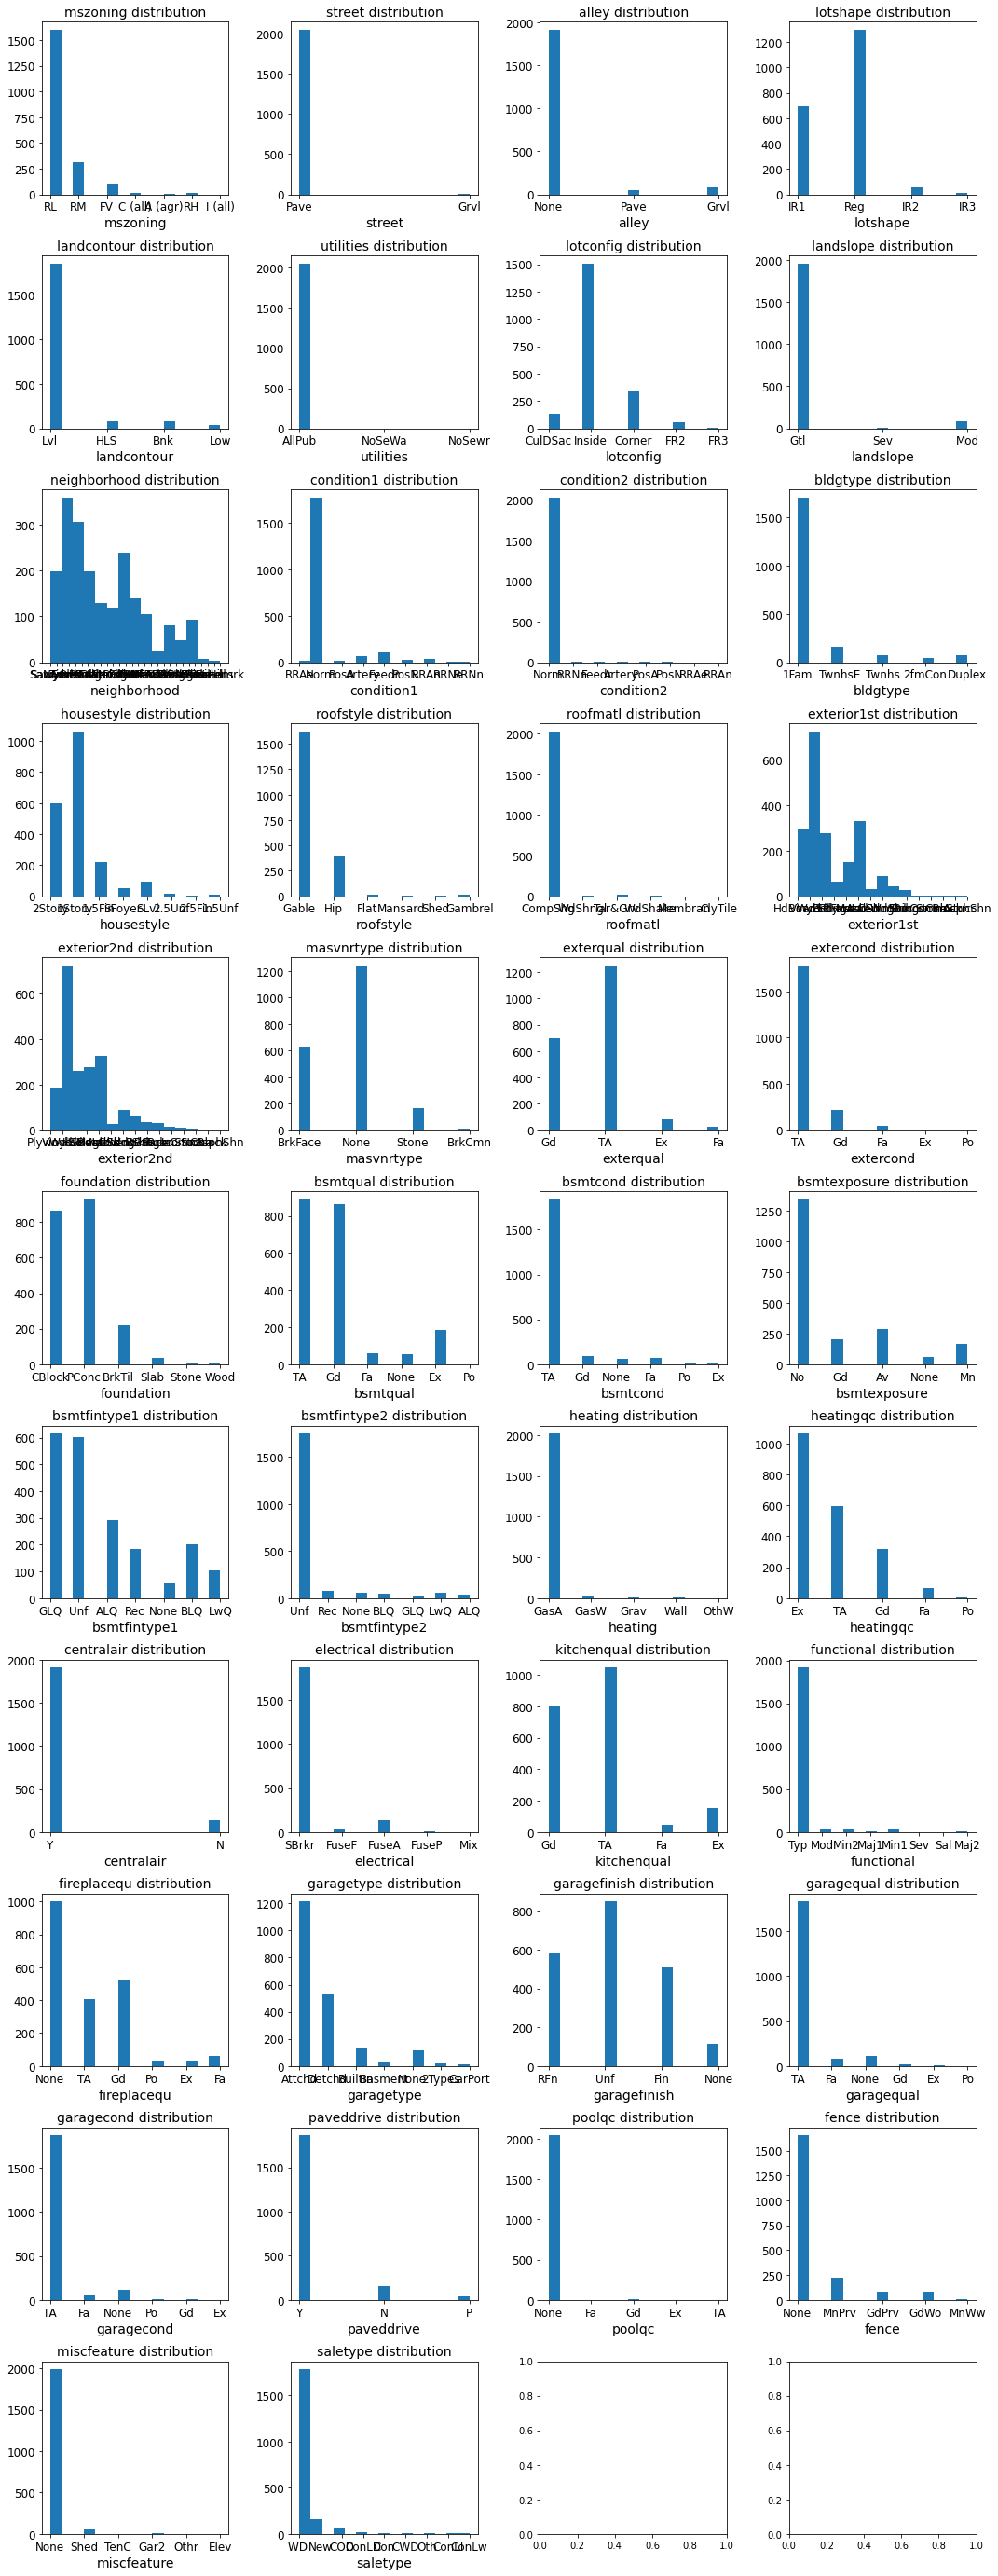

In [64]:
# histogram subplots
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, pos = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    pos = pos.ravel() 
    for i, column in enumerate(list_of_columns): 
        pos[i].hist(dataframe[column],bins=15)
        pos[i].set_title(f'{column} distribution',fontsize=14)
        pos[i].tick_params(labelsize=12)
        pos[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()
    
subplot_histograms(train_1st, cat_cols)
plt.savefig('../images/hist_cat.png')

#### Boxplot (Categorical)

Features like neighborhood, exterior 1st and 2nd needs to be processed in order to get a better prediction on sale price as there are too many outliers and values within the feature. 

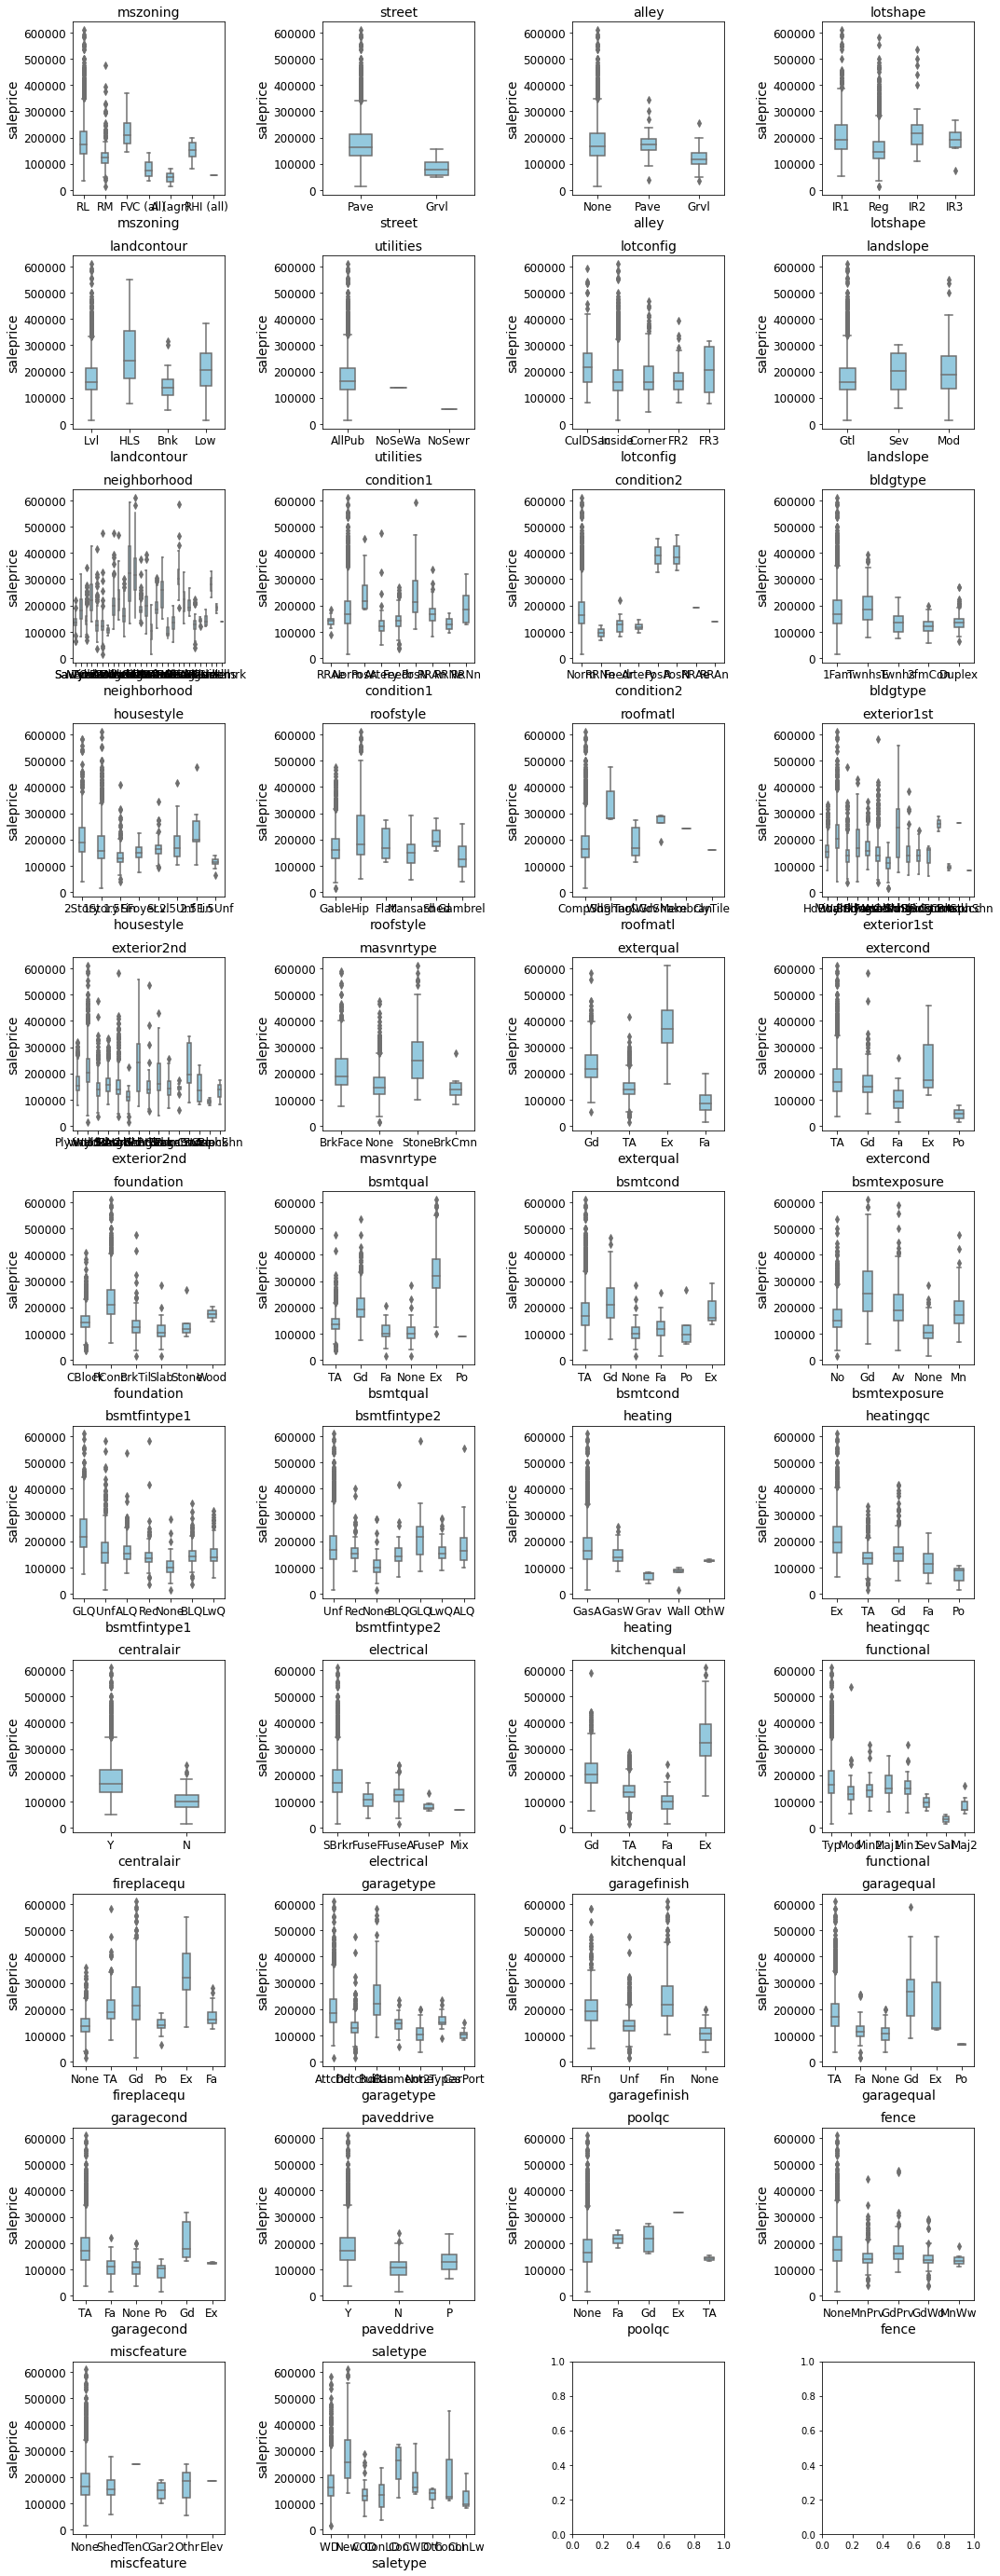

In [65]:
# boxplot subplots
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, pos = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    pos = pos.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe.saleprice, width = 0.3, ax = pos[i], color='skyblue')
        pos[i].set_title(column,fontsize=14)  
        pos[i].tick_params(labelsize=12)
        pos[i].set_xlabel(column, fontsize=14)
        pos[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
subplot_box(train_1st, cat_cols)
plt.savefig('../images/boxplot_cat.png')

#### Scatterplot (Numerical)

Most linear relationship between the features and saleprice are generally the square feet, year build or remod
Other than that, there are presence of outliers within the features(e.g. lotarea, lotfrontage)

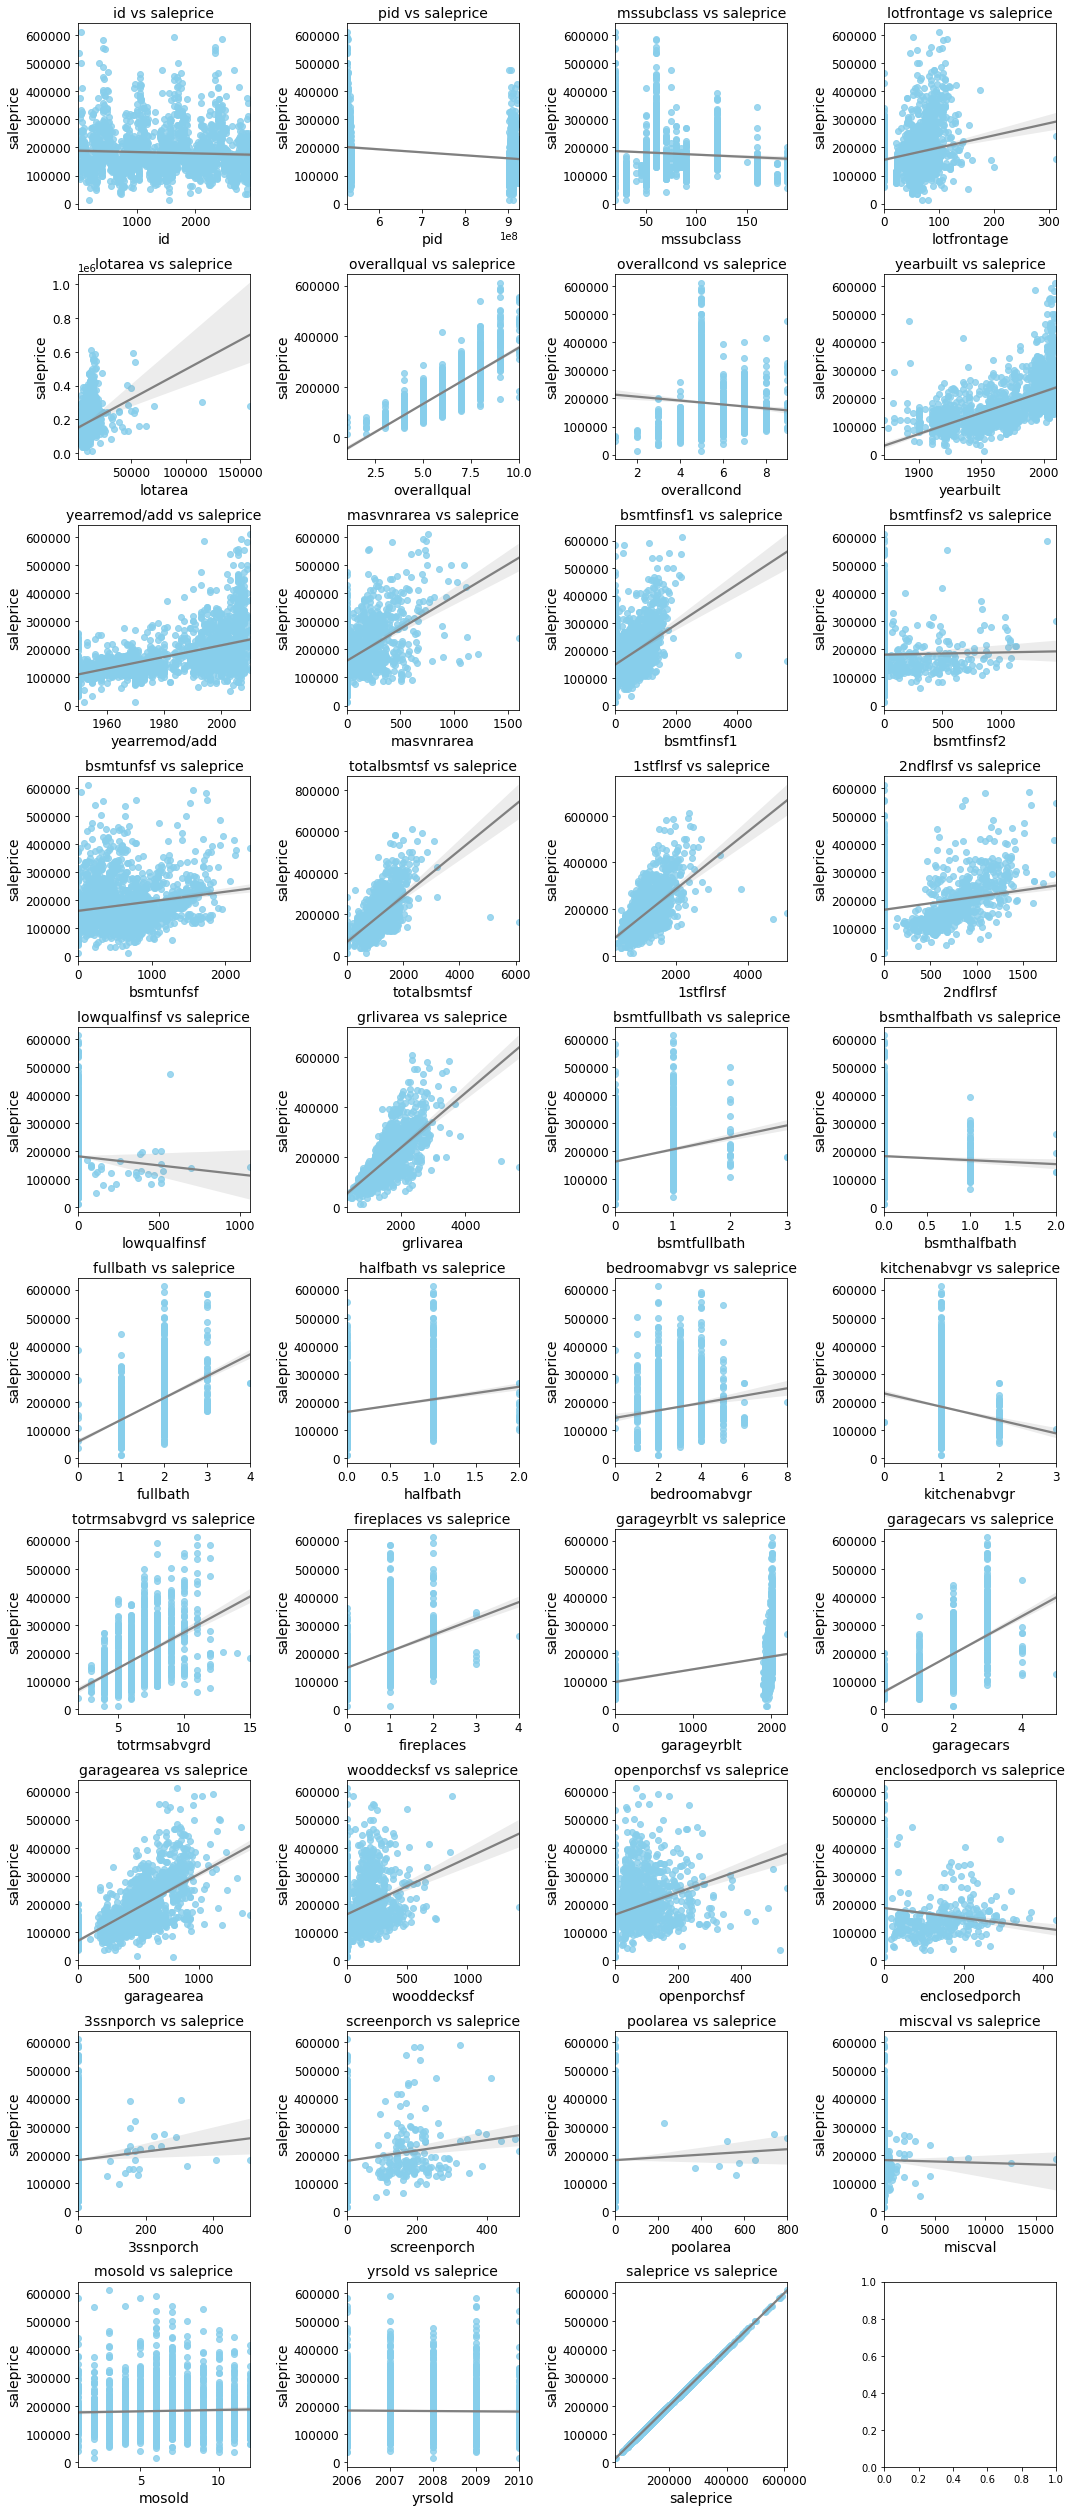

In [66]:
# scatterplot subplots
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, pos = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    pos = pos.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=pos[i], \
                    scatter_kws={'facecolors':'skyblue','edgecolor':'skyblue'},
                    line_kws = {'color':'grey'})
        pos[i].set_title(f'{column} vs saleprice',fontsize=14)  
        pos[i].tick_params(labelsize=12)
        pos[i].set_xlabel(column, fontsize=14)
        pos[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
subplot_scatter(train_1st, num_cols)
plt.savefig('../images/scatterplot_num.png')

#### Histogram (Numerical)

Some of the features within the dataset are right skewed which likely indicates that most housing within the dataset lacks additional features like basement, porch and pool

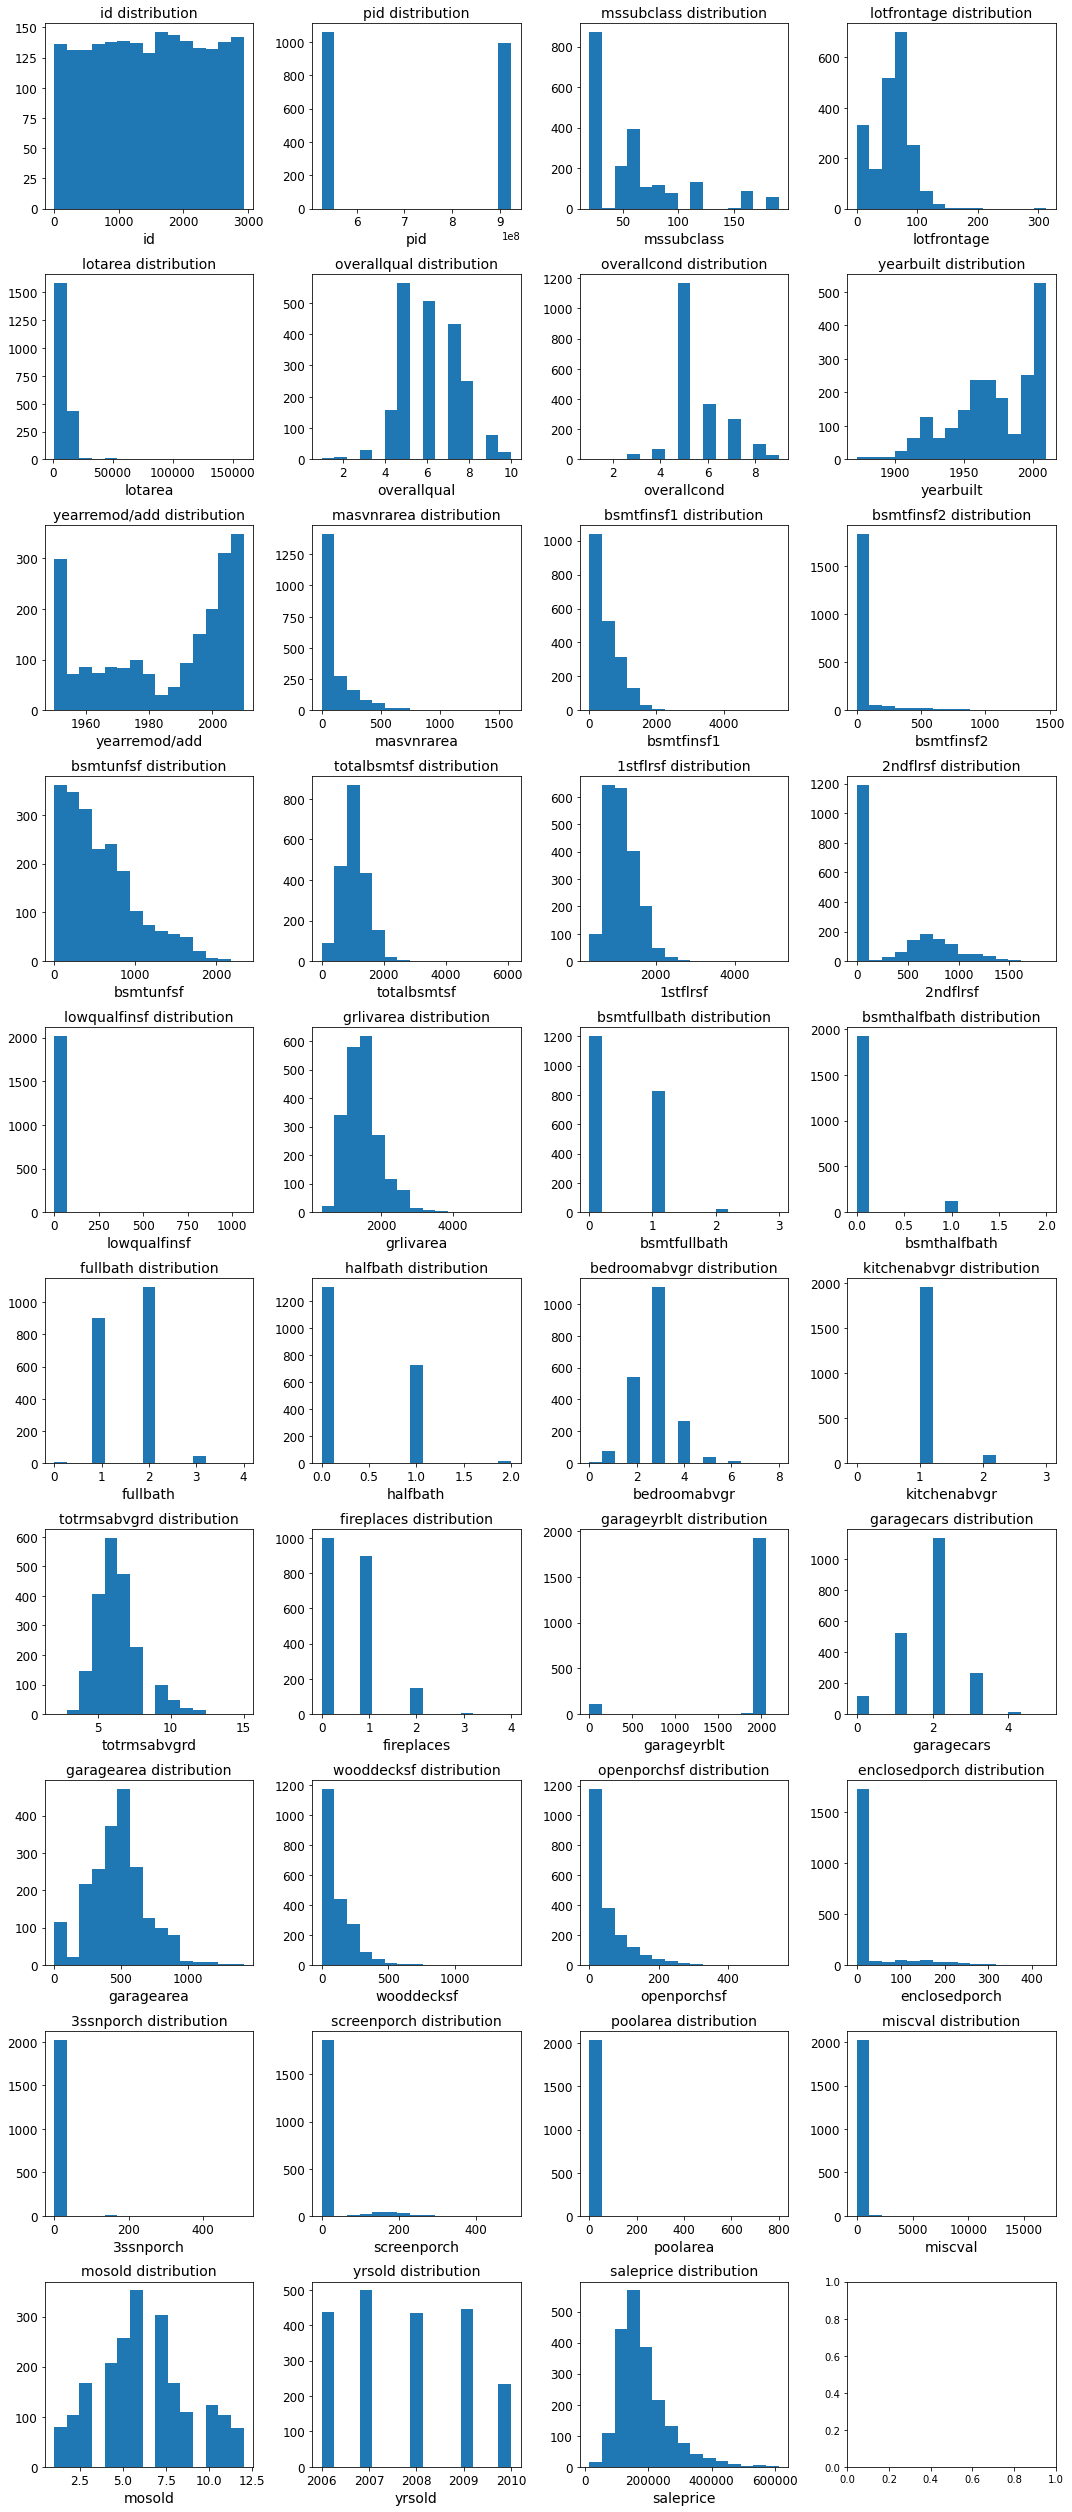

In [67]:
subplot_histograms(train_1st,num_cols)
plt.savefig('../images/hist_num.png')

#### Correlation Heatmap

Based on initial assessment from correlation, these are the following features closely related to sale price<Br>
Features = overallqual, grlivarea, garagearea, garagecars, totalbsmtsf, 1stflrsf, yearbuilt, yearremod/add, fullbath<Br>
For cars and area in garage, there is high correlation as both are measuring the space of the garage but using different unit of measurement. <br>

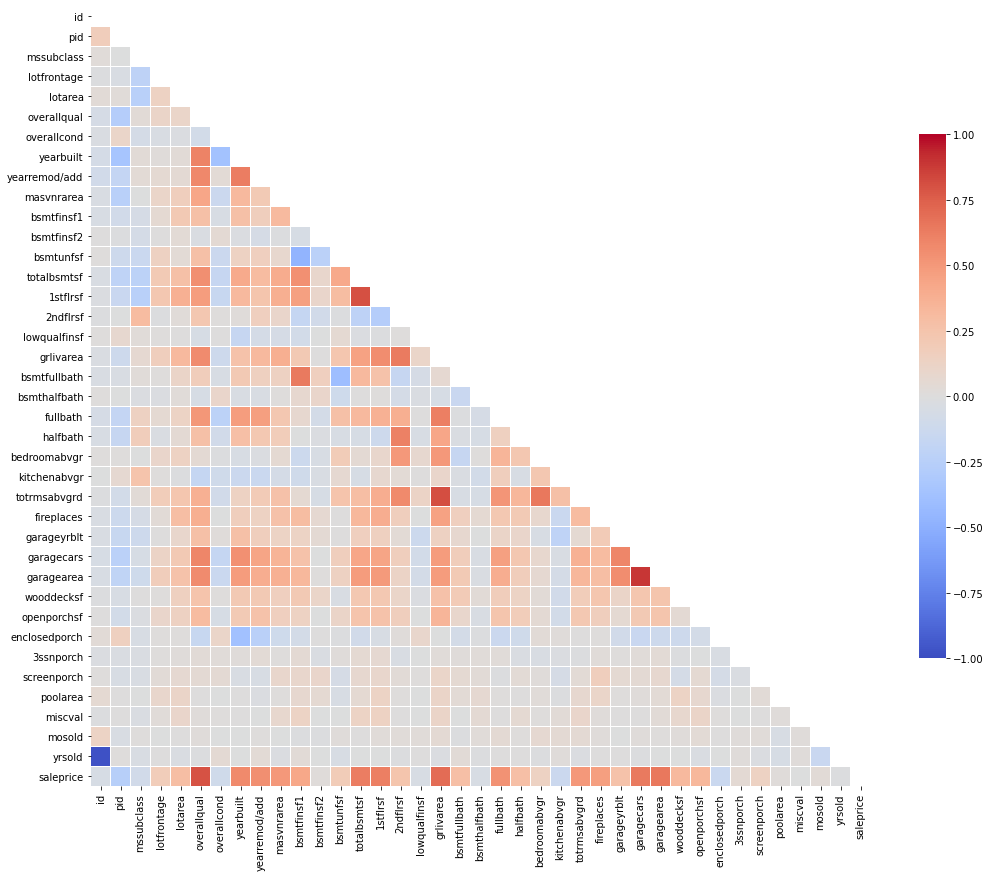

In [68]:
#Correlation of data set using heatmap.
#To mask one half of the heatmap to better represent the correlation using the heatmap, use "np.triu()" to obtain the upper half value of the triangle
#Source: https://numpy.org/doc/stable/reference/generated/numpy.triu.html
mask = np.triu(train_1st.corr())
plt.figure(figsize = (15,15))

sns.heatmap(train_1st.corr(), 
            cmap = "coolwarm",
            cbar_kws = {'shrink':0.5},
            linewidth = 0.1,
            square=True,
            vmin=-1, vmax= 1,
            mask=mask);
plt.tight_layout()
plt.savefig('../images/heatmap.png')

In [22]:
#one-hot encode catergorical columns
train_dum = pd.get_dummies(train_1st, drop_first=True)

In [45]:
dum_corr_cols = train_dum.corr().nlargest(10, 'saleprice').index
dum_corr_cols

Index(['saleprice', 'overallqual', 'grlivarea', 'garagearea', 'garagecars',
       'totalbsmtsf', '1stflrsf', 'yearbuilt', 'yearremod/add', 'fullbath'],
      dtype='object')

## Observation

1. There are 26 columns with varying amounts of null values in total. Among which some null value represent houses without certain features. The nulls in these categorical columns will be filled with "None", and those in numerical columns will be filled with 0 as it is likely to have a house without such features. <br><br>

2. There are a few with typo error which the incorrect years being inputed. This will either be replaced with the correct year based on assumption (e.g. garage was build in 2207 but it is likely to be 2007) or removed as it is not logical (e.g. housing was sold before build). <br><br>

2. These features contains common rating: <br>
    a. From Very Excellent to Very Poor in terms of 10 to 1: (1)OverallQual, (2)OverallCond<br>
    b. From Excellent to Poor in terms of Ex to Po(Special rating of NA if non-existence): <br>
    (1)ExterQual, (2)ExterCond, (3)BsmtQual, (4)BsmtCond, (5)BsmtExposure, (6)HeatingQC,<br>
    (7)KitchenQual, (8)FireplaceQu, (9)GarageQual, (10)GarageCond, (11)PoolQC <br><br>
    
3. ID and PID are indentifiers for each individual property which does not affect the sale price<br><br>

4. MS SubClass should be converted to an object as it is consider a categorical data<br><br>

5. Month and Year should be categorical datas (can even consider studying seasonally)<br><br>

6. Some data contains a certain percentage of null values (to replace the null values with the appropriate value)<br><br>

7. Some data(e.g. Pool QC, Misc Feature, Alley, Fence) contains more than 50% of null values (can consider dropping the columns with more than 50% null values)<br><br>

8. Houses with no garage had null values for all garage-related variables(to replace the null with 'None' for categorical and '0' for continous)<br><br>

9. Some data points can be combined to give a better correlation to sale price (e.g. Total baths can be created based on full bath = half bath)<br><br>

#### Additional: Dummy Regressor

Using Dummy Regressor, obtain a simple predictor algorithm and compare with the train model.

In [ ]:
#Source: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html
from sklearn.dummy import DummyRegressor

In [ ]:
features = [x for x in train.columns if x != 'SalePrice' and x !="Id" and x != "PID"]
X_dum = train[features]
y_dum = train['SalePrice']

In [ ]:
#using dummy regressor to create a prediction model based on a simple strategy
dummy_regr = DummyRegressor(strategy="mean")

In [ ]:
dummy_regr.fit(X_dum, y_dum)

In [ ]:
dum_pred = dummy_regr.predict(X_dum)
dum_pred

In [ ]:
dummy_regr.score(X_dum, y_dum)

In [ ]:
submission = pd.DataFrame({
        'id': test['Id'],
        'SalePrice': dum_pred[0:879]
    },
    columns = ['id', 'SalePrice'])

#to faciliate fitting the predictions for submission, only 879 inputs from selection from the predictions as per test set inputs

In [ ]:
submission.shape

In [ ]:
submission.to_csv('../datasets/kaggle_submission.csv',index=False)